# Breast Cancer
## Classification predict

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Carga de datos y primer análisis

Comenzaremos cargando los datos que vamos a necesitar para la predicción

In [29]:
data = pd.read_csv('data/data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [31]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Se puede ver que todas columnas estan completas y poseen datos continuos

Vamos a analizar su distribución para eliminar valores atípicos, eliminando previamente las columna id y Unnamed: 32

In [32]:
data = data.drop(['Unnamed: 32','id'],axis=1)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [33]:
#Definimos nuestra variable objetivo del resto
y = 'diagnosis'
features = list(data.columns)
features.remove(y)

In [34]:
#Crearé una función para la eliminación de outliers según los quantiles que registre cada variable

def outlier_cleaning(data,features):
    clean_data = data
    for x in features:
        min = clean_data[x].quantile(0)
        max = clean_data[x].quantile(1)
        clean_data = clean_data[(clean_data[x]<max)&(clean_data[x]>min)]
    return clean_data

clean_data = outlier_cleaning(data,features)
clean_data.diagnosis.value_counts()


B    317
M    183
Name: diagnosis, dtype: int64

In [35]:
clean_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


Aprovecharemos para dejar dividido tambien los datos en train y test

In [36]:
df_train, df_test = train_test_split(clean_data, test_size=0.2,random_state=123)

# Selección de predictores

Limpios los datos, podemos proceder a analizar la correlación entre los features disponibles y así poder elegir nuestros predictores. Para esto, comenzaremos visualizando un mapa de color para distinguir la correlación entre las variables, a fin de quedarnos solo con una de las que tengan una fuerte relación.

<AxesSubplot:>

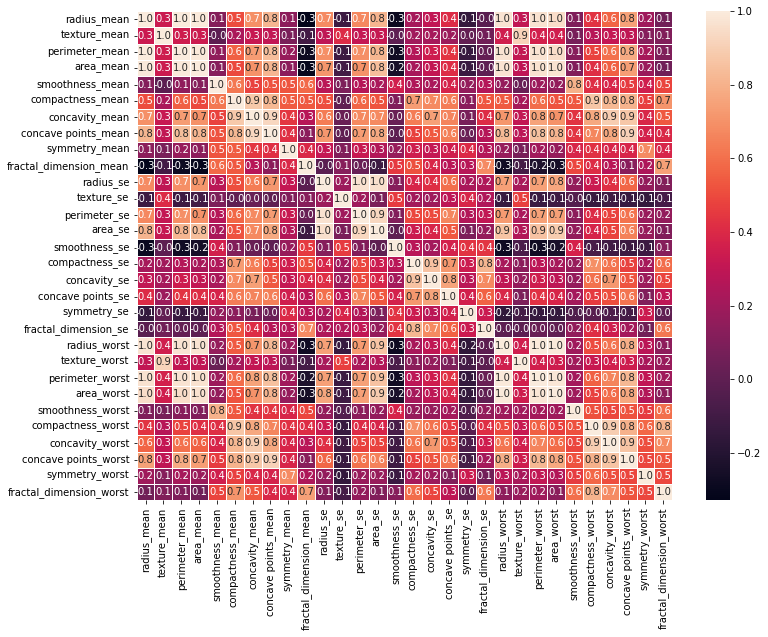

In [37]:
corrmat = clean_data[features].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

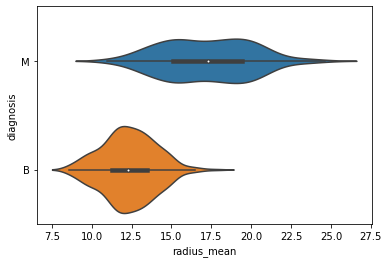

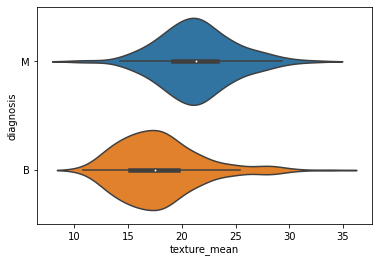

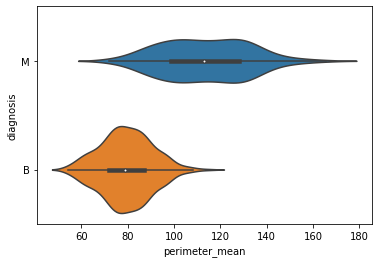

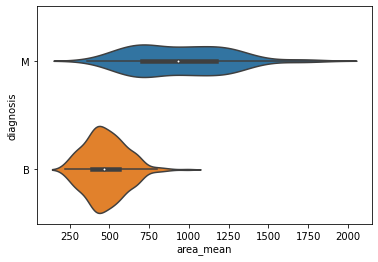

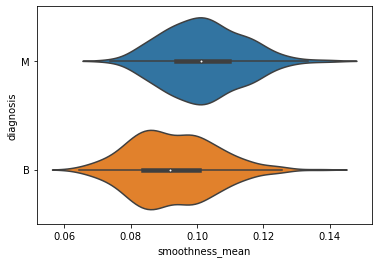

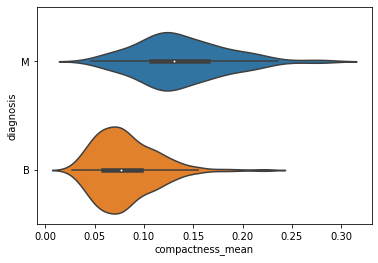

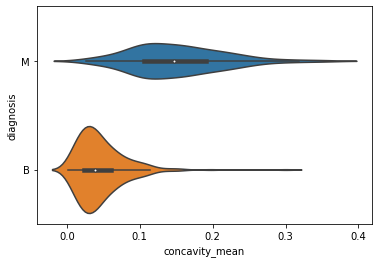

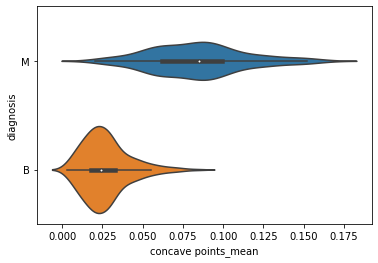

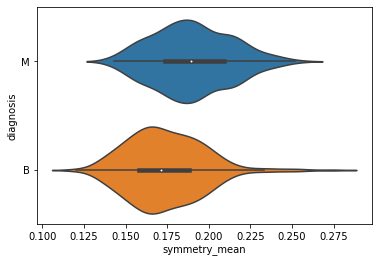

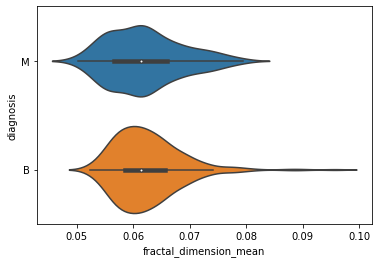

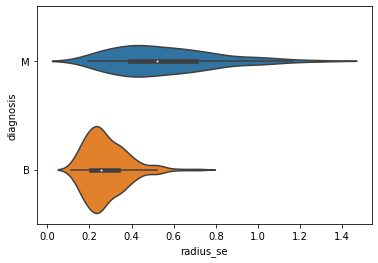

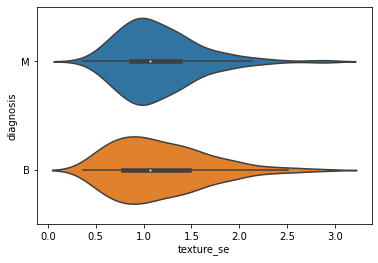

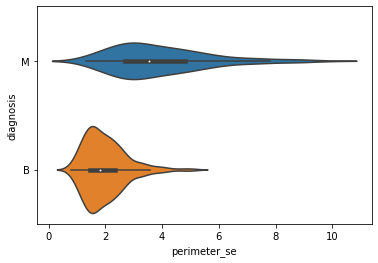

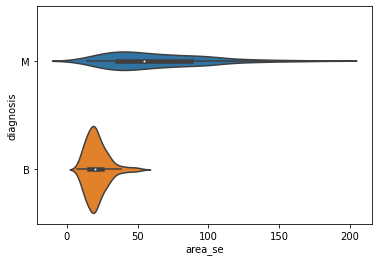

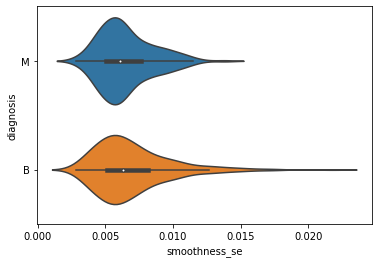

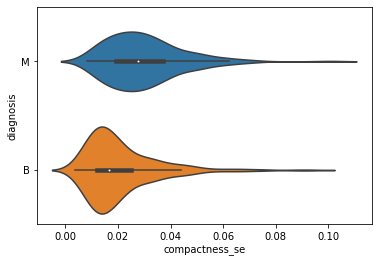

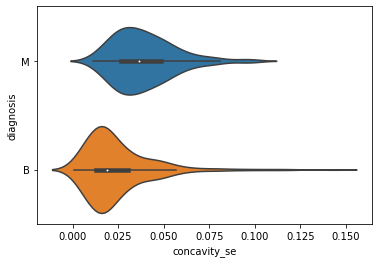

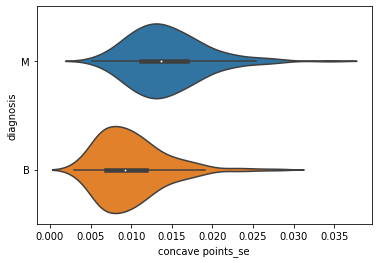

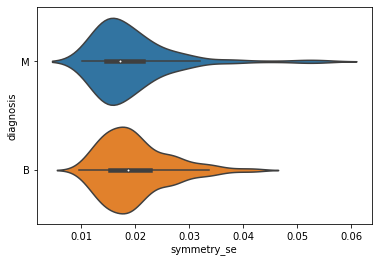

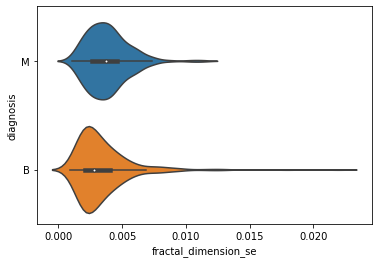

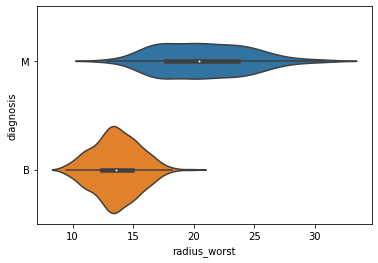

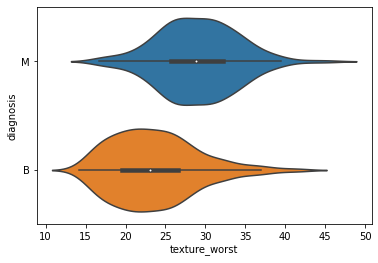

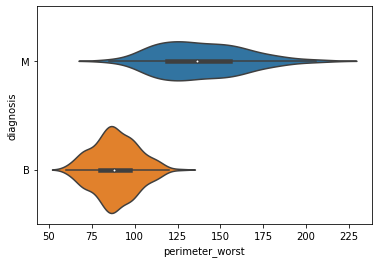

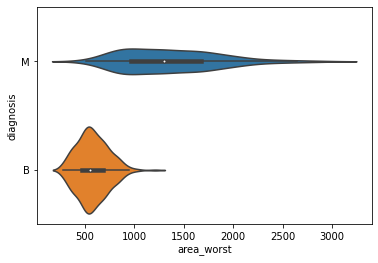

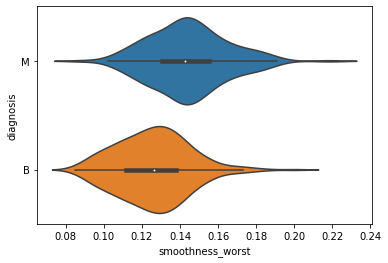

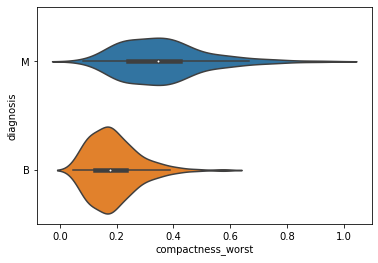

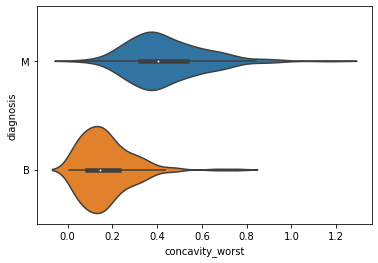

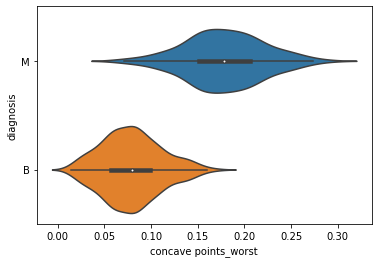

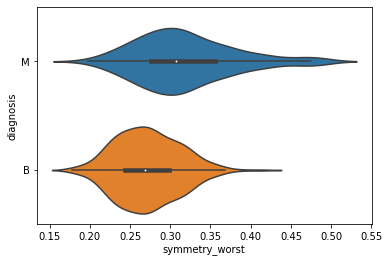

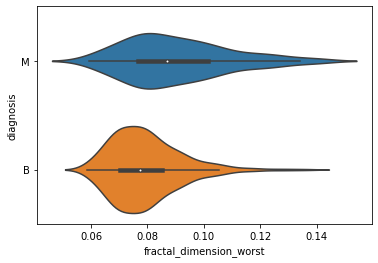

In [38]:
for x in features:
    plt.figure()
    sns.violinplot(clean_data[x],data[y])
plt.show()
    

A través de esta información combinada, podemos hacer una primera selección, donde descartemos aquellos atributos que guardan una correlación entre si, o baja relación con nuestra variable objetivo

In [39]:
drop_features1=['radius_mean','perimeter_mean','compactness_mean','concavity_mean','smoothness_mean','symmetry_mean',
'fractal_dimension_mean','radius_se','perimeter_se','area_se','compactness_se','texture_se', 'smoothness_se', 'symmetry_se',
'fractal_dimension_se','radius_worst','perimeter_worst','area_worst','texture_worst','smoothness_worst','compactness_worst',
'concavity_worst','symmetry_worst','fractal_dimension_worst']

In [40]:
predictores1 = list(features)
for x in drop_features1:
    predictores1.remove(x)
predictores1

['texture_mean',
 'area_mean',
 'concave points_mean',
 'concavity_se',
 'concave points_se',
 'concave points_worst']

Comparemos los resultados con nuestros predictores vs la utilización de todos los atributos

In [41]:
#Crearemos las funciones para poder visualizar las métricas de cada modelo de acá en adelante

def metricas(y_test,y_pred):
	CM = confusion_matrix(y_test,y_pred)
	AC = accuracy_score(y_test, y_pred)
	F1 = f1_score(y_test,y_pred, average='macro')
	return CM, AC, F1
def visualiza_metricas(y_test,y_pred,titulo):
	CM,AC,F1 =metricas(y_test,y_pred)

	plt.figure(figsize=(3,3))
	matriz=pd.DataFrame(CM, columns=['Benigno','Maligno'])
	plt.matshow(matriz, cmap='Blues', vmin=0, vmax=10, fignum=1)
	plt.title('Predichas')
	plt.ylabel('Reales')
	plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
	plt.yticks(range(len(matriz.columns)), matriz.columns)
	etiquetas =(('Verdaderos\nbenignos', 'Falsos\nmalignos'),('Falsos\nbenignos','Verdaderos\nmalignos'))
	for i in range(len(matriz.columns)):
		for j in range(len(matriz.columns)):
			plt.text(i,j+0.14, str(matriz.iloc[i,j]), fontsize=30, ha='center', va='center')
			plt.text(i,j-0.25, etiquetas[i][j], fontsize=11.5, ha='center', va='center')
	plt.text(1.60, -0.30, titulo, fontsize=25, c='red')
	plt.text(2.1, 0.10, f'Accuracy: {AC}', fontsize=20)
	plt.text(2.1, 0.40, f'F1: {F1}', fontsize=20)
	plt.show()
	print('\n'*10)

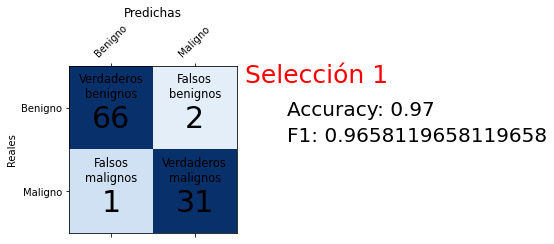

In [42]:
X_train1, X_test1=df_train[predictores1],df_test[predictores1]
y_train1, y_test1=df_train[[y]],df_test[[y]]
modelo1 = RandomForestClassifier(random_state=123)
modelo1.fit(X_train1, y_train1)
y_pred1 = modelo1.predict(X_test1)
visualiza_metricas(y_test1,y_pred1,'Selección 1')

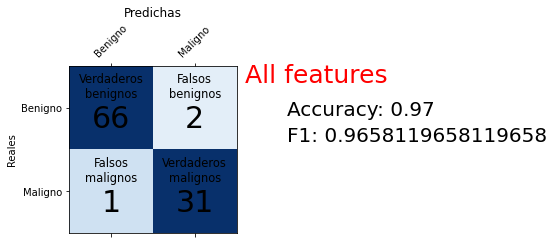

In [43]:
X_train2, X_test2=df_train[features],df_test[features]
y_train2, y_test2=df_train[[y]],df_test[[y]]
modelo2 = RandomForestClassifier(random_state=123)
modelo2.fit(X_train2, y_train2)
y_pred2 = modelo2.predict(X_test2)
visualiza_metricas(y_test2,y_pred2,'All features')

Podemos apreciar, como a pesar de haber bajado de 30 atributos a solo 6, se pudo mantener los mismos parámetros de precisión a la hora de predecir. Continuaremos viendo otras opción en nuestra selección de predictores, esta vez, Utilizando Univariate Feature Selection, que nos ofrece Sklearn, para poder visualizar los puntajes que asigna a cada atributo como predictor:

In [44]:
select_feature = SelectKBest(chi2, k='all').fit(clean_data[features],clean_data[y])
#Ordenaremos los resultados en una lista de listas para visualizar mejor
values = [] 
for x in range(len(features)):
    values.append([select_feature.scores_[x],select_feature.feature_names_in_[x]])
values.sort(reverse=True)
values[0:10]

[[83656.07835350442, 'area_worst'],
 [39198.64703695779, 'area_mean'],
 [5744.262620732812, 'area_se'],
 [2723.5929298747196, 'perimeter_worst'],
 [1465.0117433254275, 'perimeter_mean'],
 [370.0741015422259, 'radius_worst'],
 [195.1624608607881, 'radius_mean'],
 [163.09033467384444, 'perimeter_se'],
 [131.78493625006018, 'texture_worst'],
 [72.79349219948887, 'texture_mean']]

Como podemos ver, las puntuaciones altas se pierden rápidamente, pudiendo destacar las primeras seis variables. Tomaré nota de esta cantidad de predictores, ya que se vuelve a repetir. Veamos sus resultados a la hora de predecir:

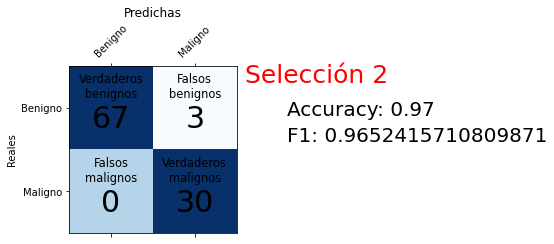

In [45]:
predictores2= ['area_worst','area_mean','area_se','perimeter_worst','perimeter_mean','radius_worst']

X_train3, X_test3=df_train[predictores2],df_test[predictores2]
y_train3, y_test3=df_train[[y]],df_test[[y]]
modelo3 = RandomForestClassifier(random_state=123)
modelo3.fit(X_train3, y_train3)
y_pred3 = modelo3.predict(X_test3)
visualiza_metricas(y_test3,y_pred3,'Selección 2')


Utilizaremos ahora la Recursive Feature Elimination, con el fin de basar una selección según los pesos van adquiriendo los atributos a medida que se vayan descartando los menos influyentes, hasta llegar a los k predictores deseados

In [46]:
rf = RandomForestClassifier()      
rfe = RFE(estimator=rf, n_features_to_select=6, step=1)
rfe = rfe.fit(clean_data[features],clean_data[y])
rfe.get_feature_names_out()

array(['area_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concave points_worst'],
      dtype=object)

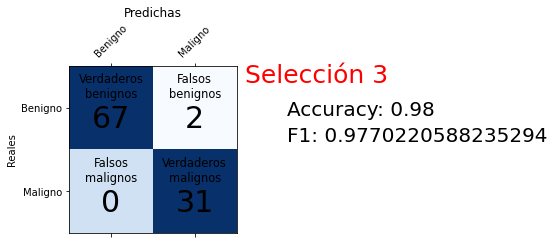

In [47]:
predictores3= ['perimeter_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concave points_worst']

X_train4, X_test4=df_train[predictores3],df_test[predictores3]
y_train4, y_test4=df_train[[y]],df_test[[y]]
modelo4 = RandomForestClassifier(random_state=123)
modelo4.fit(X_train4, y_train4)
y_pred4 = modelo4.predict(X_test4)
visualiza_metricas(y_test4,y_pred4,'Selección 3')

Ahora, para una última valoración, veremos los puntajes que asocia el Random Forest a cada atributo según su importancia para el modelo

In [48]:
importances_list = []
importances_mean = []
importances_result = []
cycles = 5
for x in range(cycles):          #Completamos tantos registros de importances como pidamos
    rf = RandomForestClassifier()    
    rf = rf.fit(clean_data[features],clean_data[y])
    importances_list.append(rf.feature_importances_)

for x in range(len(features)):   #Creamos los valores promedios de todos los importances
    mean = 0
    for z in importances_list:
        mean = mean + z[x]
    importances_mean.append(mean/cycles)

for x in range(len(features)):
    importances_result.append([importances_mean[x],features[x]])
importances_result.sort(reverse=True)

In [49]:
importances_result[:6]

[[0.11709798010605565, 'radius_worst'],
 [0.11658824635225958, 'perimeter_worst'],
 [0.11612618341812116, 'concave points_mean'],
 [0.11506437926800699, 'concave points_worst'],
 [0.10902453577674856, 'area_worst'],
 [0.05928697248239152, 'concavity_mean']]

Esta última valoración, coincide perfectamente con la selección anterior utilizada, y ambas cuentan con las mejores métricas obtenidas, así que optaremos por quedarnos con esta selección.

In [50]:
predictores = predictores3
X_train, X_test=df_train[predictores],df_test[predictores]
y_train, y_test=df_train[[y]],df_test[[y]]

# Selección y ajuste del modelo

Generaremos varios modelos con diferentes clasificadores, buscando el que mejor procese nuestros datos, para después poder ajustar los hiperparámetros de forma correcta

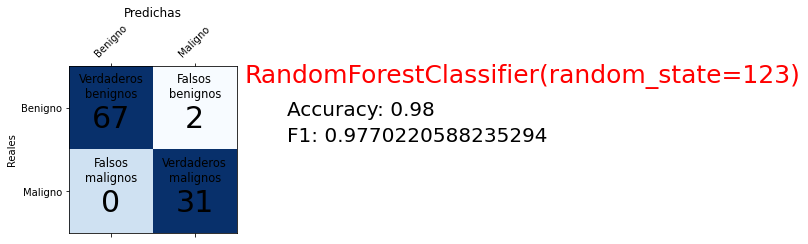

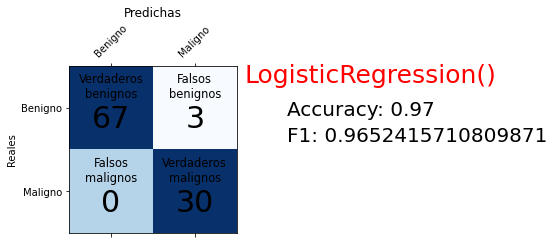

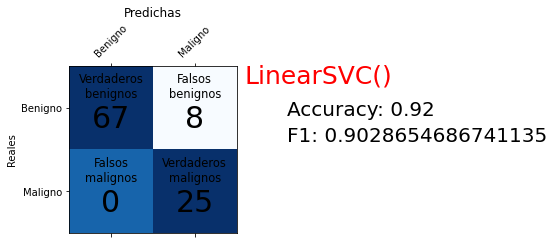

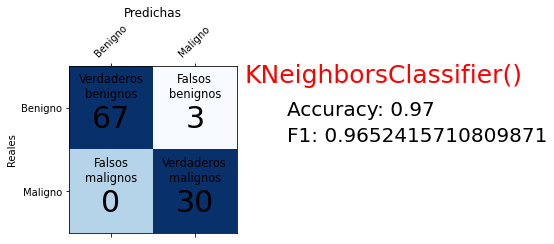

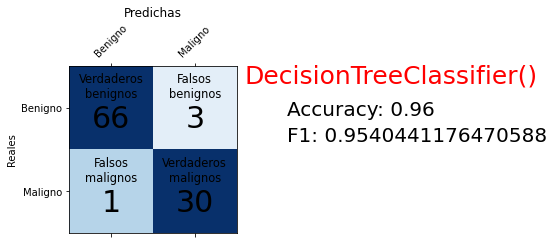

In [51]:
rf,lr,svm,knn,tree = RandomForestClassifier(random_state=123),LogisticRegression(),LinearSVC(),KNeighborsClassifier(),DecisionTreeClassifier()
modelos = [rf,lr,svm,knn,tree]
for x in modelos:
    x.fit(X_train,y_train)
    y_pred = x.predict(X_test)
    visualiza_metricas(y_test,y_pred,f'{x}')



Como podemos apreciar, el mejor clasificador es RandomForestClassifier. Ahora, ajustemos un poco más el modelo:

In [72]:
rf_final = RandomForestClassifier(random_state=123)
modelo_final = [('rf',rf)]  #Lista de tuplas para los modelos
ensemble = VotingClassifier(estimators = modelos_finales, voting = 'hard', n_jobs=-1)

hiperparametros={}                          #Diccionario con los posibles ajustes para los modelos
hiperparametros['rf__n_estimators']=[25,50,100,200]
hiperparametros['rf__criterion']=['gini','entropy','log_loss']
hiperparametros['rf__max_features']=['auto','sqrt','log2']

gridSearchCV = GridSearchCV(estimator = ensemble, param_grid = hiperparametros, cv=5,n_jobs=-1, return_train_score=True)
gridSearchCV.fit(X_train, y_train)  #Lo entrenamos con los datos a analizar
gridSearchCV.best_params_ #Devuelve diccionario con los hiperparámetros y su mejor valor


0.9324999999999999


{'rf__criterion': 'gini', 'rf__max_features': 'auto', 'rf__n_estimators': 100}

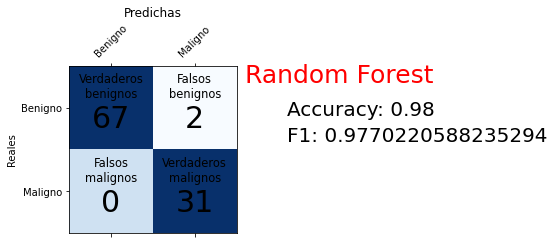

In [78]:
rf = RandomForestClassifier(random_state=123,criterion='gini',max_features='auto',n_estimators=100)
rf.fit(X_train,y_train)
y_predict_final = rf_final.predict(X_test)
visualiza_metricas(y_test,y_predict_final,'Random Forest')

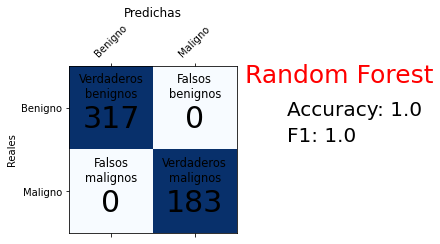

In [89]:
rf_final = RandomForestClassifier(random_state=123,criterion='gini',max_features='auto',n_estimators=100)
rf_final.fit(clean_data[predictores],clean_data[y])

# Conclusiones

Después de analizar los datos y limpiarlos, se pudo proceder a una correcta selección de predictores que mantuviera la precisión en la predicción reduciendo la cantidad a variables. Una vez encontrada el puntaje de varios modelos, se seleccionó Random Forest y se lo ajustó con la ayuda de GridSearchCV y VotingClassifier, obteniendo una puntuación final del 98%